In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

ModuleNotFoundError: No module named 'pandas'

In [123]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [124]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

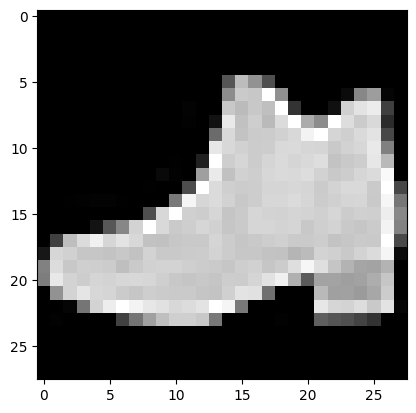

In [125]:
plt.imshow(x_train[15], cmap = 'grey')

In [138]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

N = 60000

x_train = x_train[:N] / 255
x_test = x_test[:N] / 255

y_train = y_train[:N]
y_test = y_test[:N]


In [139]:
batch_size = 256
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

Побудуємо базову модель

In [140]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras. layers.Dense(128, activation='relu'),
tf.keras. layers.Dense(64, activation='relu'),
tf.keras. layers.Dense (10)
])

In [142]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [143]:
model.summary ()

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_69 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3256 - sparse_categorical_accuracy: 0.5379 - val_loss: 0.7395 - val_sparse_categorical_accuracy: 0.7057
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6986 - sparse_categorical_accuracy: 0.7536 - val_loss: 0.7245 - val_sparse_categorical_accuracy: 0.7327
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5525 - sparse_categorical_accuracy: 0.7987 - val_loss: 0.5743 - val_sparse_categorical_accuracy: 0.7950
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4894 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.5613 - val_sparse_categorical_accuracy: 0.7937
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4135 - sparse_categorical_accuracy: 0.8409 - val_loss: 0.5945 - val_sparse_categorical_accuracy: 0.7937
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4173 - sparse_categorical_accuracy: 0.8489 - val_loss: 0.7174 - val_sparse_categorical_accuracy: 0.7573
Epoch 7/20
94/94

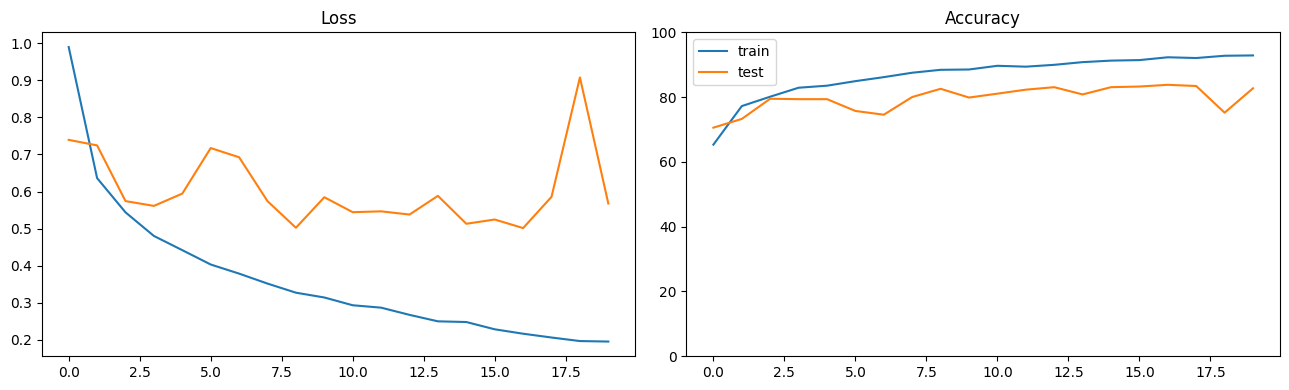

In [144]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
plot_history(history)

Пропоную розглянути результати побудови моделей з різними гіперпараметрами 

Вибір оптимізатора

In [145]:
collect = {}

optimizers_list = [
tf.keras.optimizers.Adam,
tf.keras.optimizers.Adagrad,
tf.keras.optimizers.Adam,
tf.keras.optimizers.Adamax,
tf.keras.optimizers.Ftrl,
tf.keras.optimizers.Lion,
tf.keras.optimizers.Nadam,
tf.keras.optimizers.RMSprop,
tf.keras.optimizers.SGD
]

for opt in optimizers_list:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(
        loss=tf.keras. losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=opt(learning_rate=0.001), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    print(opt.__name__)
    collect[opt.__name__] = history.history['val_sparse_categorical_accuracy']

Adam
Adagrad
Adam
Adamax
Ftrl


KeyboardInterrupt: 

In [133]:
pd.DataFrame(collect).T.style.background_gradient(cmap='viridis')

,0,1,2,3,4
Adam,0.843700,0.847100,0.843300,0.857400,0.866900
Adagrad,0.694100,0.742900,0.765600,0.780200,0.786700
Adamax,0.822300,0.835500,0.851000,0.853700,0.854600
Ftrl,0.100000,0.100000,0.100000,0.100000,0.100000
Lion,0.829200,0.839700,0.845900,0.834700,0.838800
Nadam,0.827500,0.853300,0.858900,0.863400,0.859400
RMSprop,0.806000,0.826600,0.851700,0.843400,0.860300
SGD,0.615900,0.682700,0.718000,0.737300,0.748300


З таблиці найвийщий результат у оптимізатора Nadam, тому подальші моделі будемо навчати за допомогою нього

**Вибрів кількості шарів**

In [163]:

collect_2 = {}

#модель з 1 шаром
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

model.compile(
        loss=tf.keras. losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
collect_2['1'] = history.history['val_sparse_categorical_accuracy']

#модель з 2 шарами
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

model.compile(
        loss=tf.keras. losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
collect_2['2'] = history.history['val_sparse_categorical_accuracy']

#модель з 3 шарами
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

model.compile(
        loss=tf.keras. losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
collect_2['3'] = history.history['val_sparse_categorical_accuracy']


In [164]:
pd.DataFrame(collect_2).T.style.background_gradient(cmap='viridis')

,0,1,2,3,4
1,0.756667,0.801000,0.805333,0.818333,0.815333
2,0.752333,0.794667,0.813667,0.819667,0.825000
3,0.772667,0.809667,0.767000,0.816000,0.823000


/Users/anastsiasmirnova/.local/share/virtualenvs/goit-ds-hw-12-_31BA9zN/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


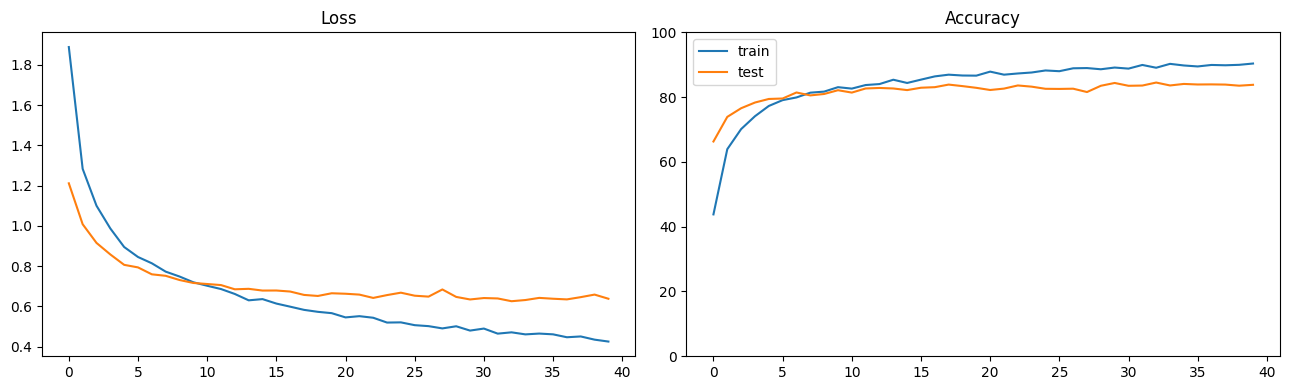

In [220]:
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
    ])

model.compile(
        loss=tf.keras. losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose=0, batch_size=64)
plot_history(history)



In [221]:
print(history.history['val_sparse_categorical_accuracy'])

[0.6629999876022339, 0.7390000224113464, 0.765666663646698, 0.7833333611488342, 0.7943333387374878, 0.7956666946411133, 0.8143333196640015, 0.8053333163261414, 0.8096666932106018, 0.8213333487510681, 0.8140000104904175, 0.8266666531562805, 0.82833331823349, 0.8266666531562805, 0.8216666579246521, 0.8289999961853027, 0.8306666612625122, 0.8386666774749756, 0.8339999914169312, 0.8286666870117188, 0.8220000267028809, 0.8263333439826965, 0.8360000252723694, 0.8323333263397217, 0.8256666660308838, 0.8253333568572998, 0.8259999752044678, 0.815666675567627, 0.8349999785423279, 0.843666672706604, 0.8349999785423279, 0.8356666564941406, 0.8450000286102295, 0.8360000252723694, 0.840666651725769, 0.8389999866485596, 0.8393333554267883, 0.8386666774749756, 0.8353333473205566, 0.8379999995231628]


In [2]:
import keras
import keras_tuner

In [4]:
def build_model(hp):
    model = model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=hp.Int("units", min_value=32, max_value=512, step=32), activation='relu'),
    
    tf.keras.layers.Dense(10)
    ])

    if hp.Boolean("dropout"):
        model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Dense(units=hp.Int("units", min_value=32, max_value=512, step=32), activation='relu'),
    )
    model.add(tf.keras.layers.Dense(10))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Nadam(learning_rate=learning_rate),
        loss=tf.keras. losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

NameError: name 'tf' is not defined

In [1]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="my_project",
)

NameError: name 'keras_tuner' is not defined